In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(mandible)

In [3]:
str(mandible)

'data.frame':	167 obs. of  2 variables:
 $ Age   : num  12.3 12.4 12.7 12.7 12.9 13.1 13.3 13.3 13.6 14 ...
 $ Length: int  8 9 11 11 10 11 9 11 12 11 ...


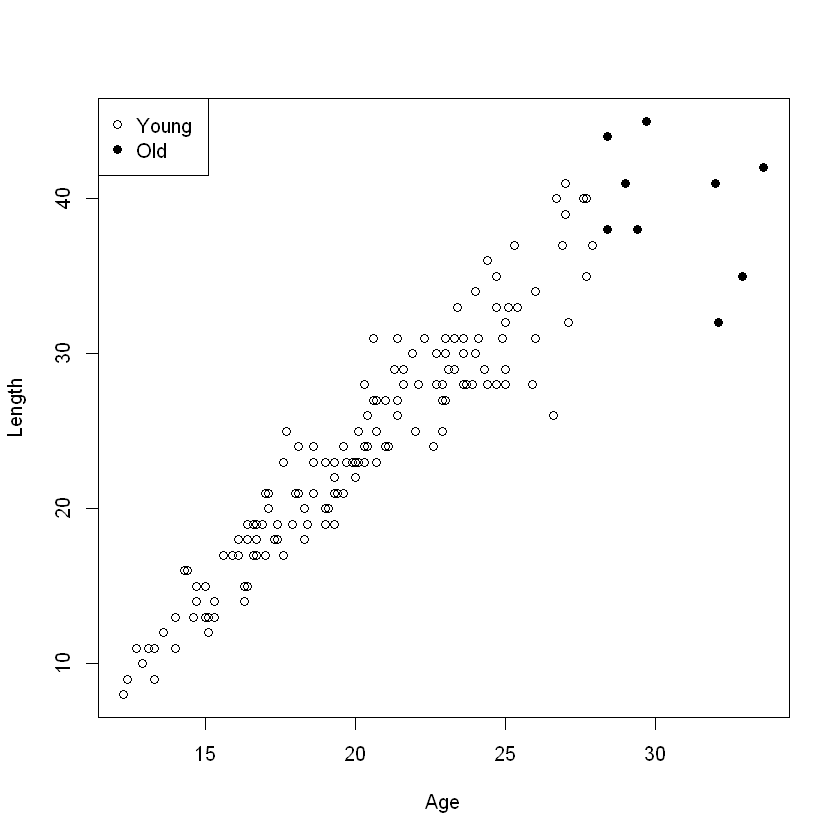

In [4]:
plot(Length ~ Age, data=mandible, pch=ifelse(Age <= 28, 1, 19))
legend("topleft", pch=c(1, 19), legend=c("Young", "Old"))

In [5]:
glm.1 <- glm(Length ~ Age, data=mandible, subset=(Age <= 28), family = Gamma(link="log"))

In [6]:
coef(summary(glm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.48098241,0.049397008,29.98122,1.238941e-66
Age,0.08138094,0.002413844,33.71425,1.586416e-73


In [7]:
glm.2 <- glm(Length ~ Age, data=mandible, subset=(Age <= 28), family = Gamma(link="inverse"))

In [8]:
coef(summary(glm.2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.108729857,0.0028044296,38.77076,5.470617e-82
Age,-0.003125698,0.0001230996,-25.39161,2.771486e-57


In [9]:
glm.3 <- glm(Length ~ poly(Age, 2), data=mandible, subset=(Age <= 28), family = Gamma(link="inverse"))

In [10]:
coef(summary(glm.3))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.04630776,0.0004406073,105.09984,5.526319e-146
"poly(Age, 2)1",-0.18028574,0.0059705790,-30.19569,8.215149e-67
"poly(Age, 2)2",0.10123865,0.0084403001,11.99467,7.285760e-24


In [11]:
anova(glm.3, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,157,17.482623,NA,NA
"poly(Age, 2)",2,15.64871,155,1.833915,660.541,1.395218e-76


In [29]:
gof.dev <- deviance(glm.3)
gof.pearson <- sum(glm.3$weights * glm.3$residuals^2)

pchisq(gof.dev, df=df.residual(glm.3), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.3), lower.tail = FALSE)

gof.dev / df.residual(glm.3)
gof.pearson / df.residual(glm.3)

[1] 1

[1] 1

[1] 0.01183171

[1] 0.01184537


	Shapiro-Wilk normality test

data:  qr3
W = 0.9954, p-value = 0.9067


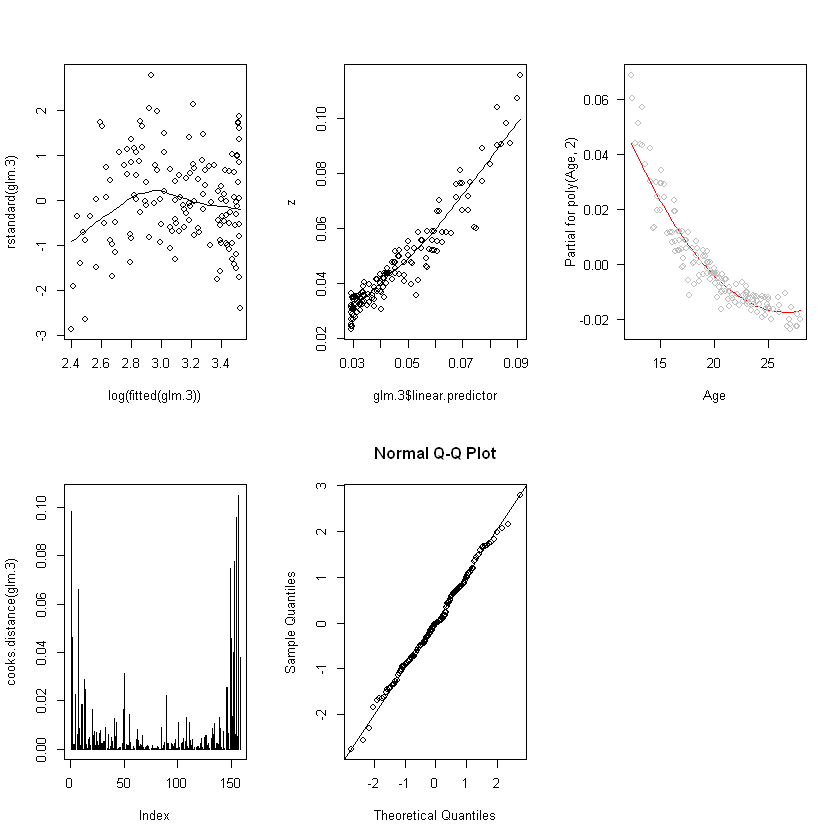

In [16]:
par(mfrow=c(2, 3))

scatter.smooth(rstandard(glm.3) ~ log(fitted(glm.3)))
z <- glm.3$linear.predictor + resid(glm.3, type="working")
scatter.smooth(z ~ glm.3$linear.predictor)
termplot(glm.3, partial.resid = TRUE, las=1)
plot(cooks.distance(glm.3), type="h")
qqnorm(qr3 <- qresid(glm.3))
qqline(qr3)
shapiro.test(qr3)

1         2         3         4         5         6         7         8 
 4.141704  4.220020  4.300470  4.383127  4.468068  4.555373  4.645125  4.737410 
        9        10        11        12        13        14        15        16 
 4.832319  4.929945  5.030385  5.133741  5.240119  5.349629  5.462386  5.578508 
       17        18        19        20        21        22        23        24 
 5.698120  5.821352  5.948338  6.079218  6.214138  6.353251  6.496715  6.644693 
       25        26        27        28        29        30        31        32 
 6.797358  6.954887  7.117465  7.285285  7.458547  7.637458  7.822234  8.013098 
       33        34        35        36        37        38        39        40 
 8.210281  8.414024  8.624575  8.842191  9.067136  9.299685  9.540118  9.788725 
       41        42        43        44        45        46        47        48 
10.045804 10.311658 10.586600 10.870946 11.165019 11.469146 11.783655 12.108879 
       49        50        51        52        53        54        55        56 
12.445147 12.792787 13.152124 13.523473 13.907138 14.303411 14.712561 15.134838 
       57        58        59        60        61        62        63        64 
15.570459 16.019609 16.482428 16.959010 17.449388 17.953530 18.471325 19.002577 
       65        66        67        68        69        70        71        72 
19.546990 20.104154 20.673537 21.254470 21.846130 22.447531 23.057509 23.674708 
       73        74        75        76        77        78        79        80 
24.297570 24.924325 25.552982 26.181324 26.806911 27.427077 28.038939 28.639415 
       81        82        83        84        85        86        87        88 
29.225238 29.792986 30.339113 30.859990 31.351950 31.811343 32.234594 32.618259 
       89        90        91        92        93        94        95        96 
32.959095 33.254120 33.500675 33.696483 33.839700 33.928955 33.963386 33.942657 
       97        98        99       100 
33.866971 33.737061 33.554172 33.320035

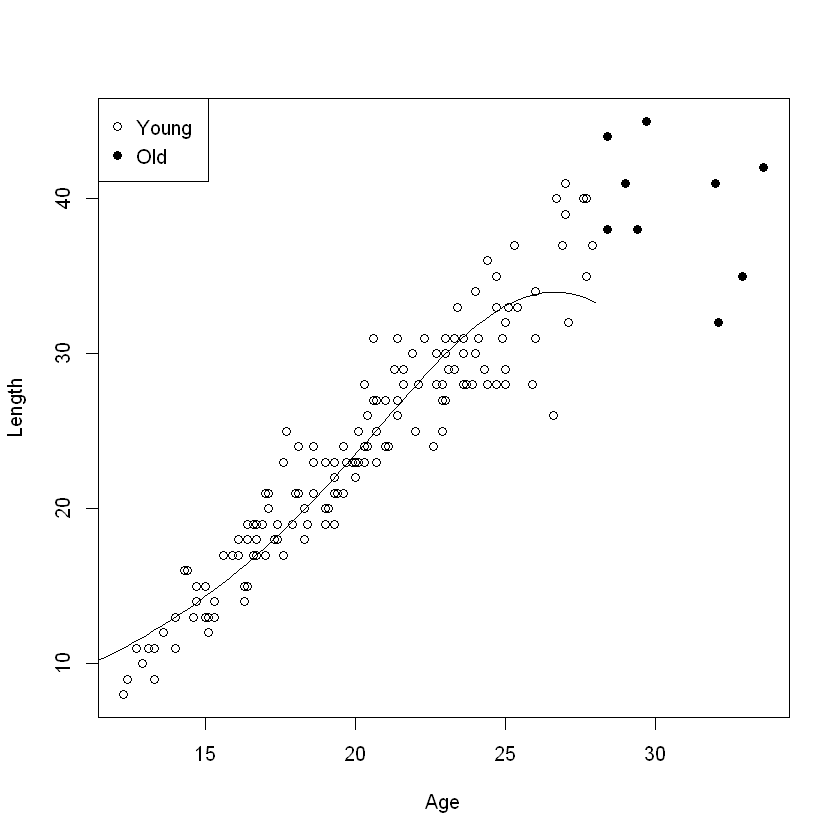

In [25]:
newAge <- seq(0, 28, lengt=100)
fit <- predict(glm.3, newdata=data.frame(Age = newAge), type="response")
plot(Length ~ Age, data=mandible, pch=ifelse(Age <= 28, 1, 19))
legend("topleft", pch=c(1, 19), legend=c("Young", "Old"))
lines(fit ~ newAge)
fit

In [26]:
confint(glm.3, level=0.9)

Waiting for profiling to be done...


,5 %,95 %
(Intercept),0.04558740,0.04703689
"poly(Age, 2)1",-0.19009649,-0.17045330
"poly(Age, 2)2",0.08743149,0.11519787
